In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import math
from sklearn.cross_validation import KFold   #For K-fold cross validation
import numpy as np
from sklearn import preprocessing, cross_validation,    svm
from sklearn.linear_model import LinearRegression
from  datetime import datetime
import matplotlib.pyplot as plt 
from matplotlib import style
import time
from math import sqrt
from sklearn import metrics
style.use('ggplot')
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
bos= pd.DataFrame( boston.data)

In [6]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
bos.columns

RangeIndex(start=0, stop=13, step=1)

In [8]:
bos.columns= boston.feature_names

In [9]:
bos['Price']= boston.target

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = bos.drop('Price' , axis= 1)

In [12]:
lm= LinearRegression()

In [13]:
lm.fit(X, bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
ans= pd.DataFrame(zip(X.columns, lm.coef_), columns= ['Attribute ', 'Coeeficient weightage'])

In [16]:
ans

,Attribute,Coeeficient weightage
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


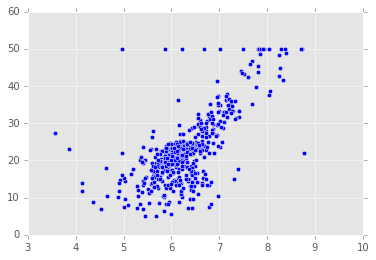

In [17]:
plt.scatter(bos.RM, bos.Price)

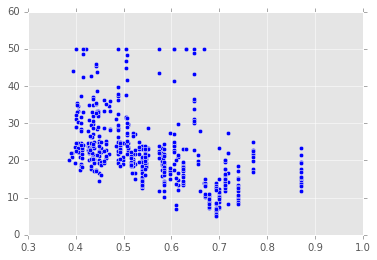

In [18]:
plt.scatter(bos.NOX, bos.Price)

In [19]:
y_pred = lm.predict((X))

In [20]:
mse =  metrics.mean_squared_error(bos.Price, y_pred)

In [21]:
mse

21.897779217687496

In [36]:
def linearRegModel(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    mse = metrics.mean_squared_error(predictions, data[outcome]) 
    #accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "mse  " 
    print (mse)
    
    mape = metrics.mean_absolute_error(predictions, data[outcome])
    print("mape is ")
    print(mape)
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    mapeError = []
    error = []
    errorPercent = []
    for train, test in kf:
        
        
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors,train_target)
  
        #Make predictions on training set:
        predictions = model.predict(data[predictors])
        
        #errorPercent.append(abs(predictions[test] - data[outcome][test])/(data[outcome][test]))
        
        error.append(metrics.mean_squared_error(data[outcome][test],predictions[test]) )
        mapeError.append(metrics.mean_absolute_error(predictions, data[outcome]))
        
        
        

    print("Cross-Validation RMSE Score : ")
    print(np.mean(error))
    
    print("Cross-Validation MAPE Score : ")
    print(np.mean(mapeError))
   

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
   

In [38]:
from sklearn.linear_model import Ridge
outcome_var = 'Price'
model = LinearRegression()
predictor_var = ['ZN','NOX','RM']
#predictor_var = ['NOX']
linearRegModel(model, bos, predictor_var,outcome_var)
m = model.coef_
print("coefficients are")
print(m)

mse  
39.0016755288
mape is 
4.22531065919
Cross-Validation RMSE Score : 
50.9214513644
Cross-Validation MAPE Score : 
4.31141430728
coefficients are
[  0.02375779 -16.74826138   8.02137471]


In [39]:
from sklearn.linear_model import Ridge
outcome_var = 'Price'
model = Ridge(alpha=2.7)

predictor_var = ['ZN','NOX','RM']
#predictor_var = ['NOX']
linearRegModel(model, bos, predictor_var,outcome_var)
m = model.coef_
print("coefficients are")
print(m)

mse  
39.3417560355
mape is 
4.23278939822
Cross-Validation RMSE Score : 
49.7828484869
Cross-Validation MAPE Score : 
4.31470470373
coefficients are
[  0.03846958 -10.8111603    8.07742961]


In [40]:
from sklearn.ensemble import RandomForestRegressor
outcome_var = 'Price'
predictor_var = ['ZN','TAX','RM']
model = RandomForestRegressor()
linearRegModel(model, bos, predictor_var,outcome_var)

mse  
4.55525356401
mape is 
1.41325287032
Cross-Validation RMSE Score : 
34.6754471531
Cross-Validation MAPE Score : 
1.95004703557


In [41]:
from sklearn.linear_model import Ridge
outcome_var = 'Price'
model = LinearRegression()
predictor_var = ['TAX','RM']
#predictor_var = ['NOX']
linearRegModel(model, bos, predictor_var,outcome_var)
m = model.coef_

mse  
37.0969973325
mape is 
4.01982659898
Cross-Validation RMSE Score : 
47.0069863884
Cross-Validation MAPE Score : 
4.10875608819


In [42]:
taxes  = bos['TAX'] + 0.0001
taxes = taxes ** 0.5
bos['sqrtTax'] = taxes

In [43]:
outcome_var = 'Price'
model = LinearRegression()
predictor_var = ['RM','CRIM','RAD','LSTAT']

linearRegModel(model, bos, predictor_var,outcome_var)
m = model.coef_

mse  
29.8609240563
mape is 
3.88012874876
Cross-Validation RMSE Score : 
44.7884100324
Cross-Validation MAPE Score : 
3.98397984368


In [44]:
from sklearn.ensemble import RandomForestRegressor
outcome_var = 'Price'
predictor_var = ['CRIM','RM','LSTAT']
model = RandomForestRegressor()
linearRegModel(model, bos, predictor_var,outcome_var)

mse  
3.32142233202
mape is 
1.12709486166
Cross-Validation RMSE Score : 
23.5751926752
Cross-Validation MAPE Score : 
1.50983794466


In [45]:
from sklearn.ensemble import AdaBoostRegressor 
outcome_var = 'Price'
predictor_var = ['CRIM','RM','LSTAT','TAX']
model = AdaBoostRegressor()
linearRegModel(model, bos, predictor_var,outcome_var)

mse  
10.7474750533
mape is 
2.69608882255
Cross-Validation RMSE Score : 
25.0612753755
Cross-Validation MAPE Score : 
2.68608051524


In [46]:
from sklearn.ensemble import GradientBoostingRegressor 
outcome_var = 'Price'
predictor_var = ['CRIM','RM','LSTAT','TAX']
model = GradientBoostingRegressor()
linearRegModel(model, bos, predictor_var,outcome_var)

mse  
3.95380029046
mape is 
1.49143609001
Cross-Validation RMSE Score : 
24.5196057273
Cross-Validation MAPE Score : 
1.74138923538
